In [646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [647]:
dataset = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")

In [648]:
dataset.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


# Data Cleaning

In [649]:
dataset = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [650]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [651]:
#Missing value
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [652]:
#Adding new column with region
df = dataset
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [653]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.00
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.00
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.00
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.00
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.00


In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [655]:
df['Region']=df['Region'].astype(int)

In [656]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [657]:
#Removing the null values
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [658]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [659]:
df = df.drop(122).reset_index(drop=True)

In [660]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [661]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [662]:
##Fixing the spaces in the column names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


# Change the required columns as integer data type

In [664]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [665]:
df[['month']].dtypes

month    object
dtype: object

In [666]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


## Changing the other columns to float data type

In [668]:
objects = [feature for feature in df.columns if df[feature].dtypes=='O']

In [669]:
df[objects]

,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...
238,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [670]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [671]:
for i in objects:
    if i !='Classes':
        df[i]=df[i].astype(float)

In [672]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.00,65.70,3.40,7.60,1.30,3.40,0.50,not fire,0
1,2,6,2012,29,61,13,1.30,64.40,4.10,7.60,1.00,3.90,0.40,not fire,0
2,3,6,2012,26,82,22,13.10,47.10,2.50,7.10,0.30,2.70,0.10,not fire,0
3,4,6,2012,25,89,13,2.50,28.60,1.30,6.90,0.00,1.70,0.00,not fire,0
4,5,6,2012,27,77,16,0.00,64.80,3.00,14.20,1.20,3.90,0.50,not fire,0


In [673]:
#Saving the cleaned Dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

## Exploratory Data Analysis

In [674]:
df_copy = df.drop(['day','month','year'],axis=1)

In [675]:
#FWI is the target variable

In [676]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.00,65.70,3.40,7.60,1.30,3.40,0.50,not fire,0
1,29,61,13,1.30,64.40,4.10,7.60,1.00,3.90,0.40,not fire,0
2,26,82,22,13.10,47.10,2.50,7.10,0.30,2.70,0.10,not fire,0
3,25,89,13,2.50,28.60,1.30,6.90,0.00,1.70,0.00,not fire,0
4,27,77,16,0.00,64.80,3.00,14.20,1.20,3.90,0.50,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.00,85.40,16.00,44.50,4.50,16.90,6.50,fire,1
239,28,87,15,4.40,41.10,6.50,8.00,0.10,6.20,0.00,not fire,1
240,27,87,29,0.50,45.90,3.50,7.90,0.40,3.40,0.20,not fire,1
241,24,54,18,0.10,79.70,4.30,15.20,1.70,5.10,0.70,not fire,1


In [677]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [678]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [679]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [680]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.00,65.70,3.40,7.60,1.30,3.40,0.50,0,0
1,29,61,13,1.30,64.40,4.10,7.60,1.00,3.90,0.40,0,0
2,26,82,22,13.10,47.10,2.50,7.10,0.30,2.70,0.10,0,0
3,25,89,13,2.50,28.60,1.30,6.90,0.00,1.70,0.00,0,0
4,27,77,16,0.00,64.80,3.00,14.20,1.20,3.90,0.50,0,0


In [681]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.00,85.40,16.00,44.50,4.50,16.90,6.50,1,1
239,28,87,15,4.40,41.10,6.50,8.00,0.10,6.20,0.00,0,1
240,27,87,29,0.50,45.90,3.50,7.90,0.40,3.40,0.20,0,1
241,24,54,18,0.10,79.70,4.30,15.20,1.70,5.10,0.70,0,1
242,24,64,15,0.20,67.30,3.80,16.50,1.20,4.80,0.50,0,1


In [682]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Density plot for all features

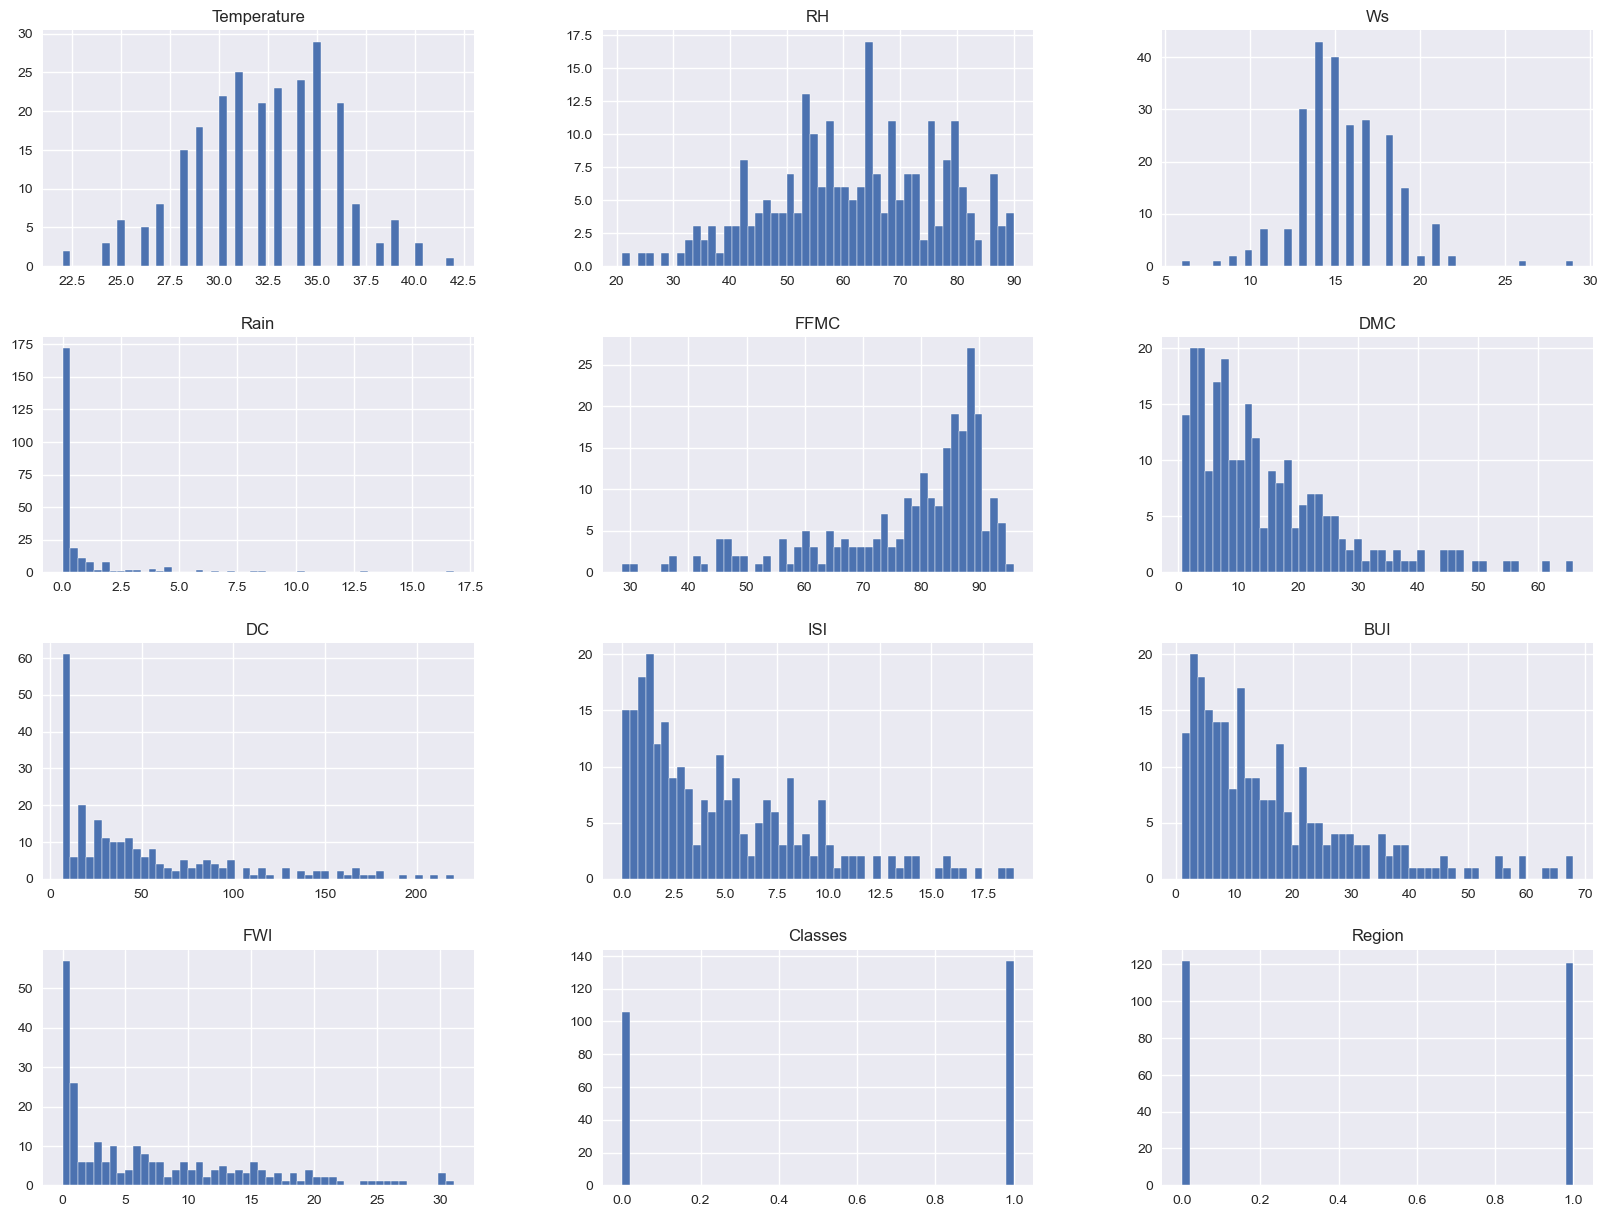

In [683]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [684]:
## Percentage for pie chart
percentage = df_copy['Classes'].value_counts(normalize=True)*100

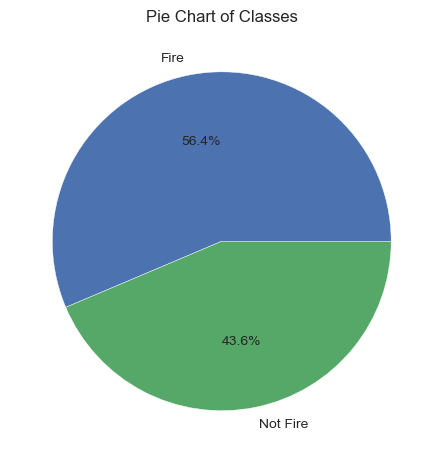

In [685]:
# Plotting piechart
classlabels = ["Fire","Not Fire"]
plt.pie(percentage,labels = classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

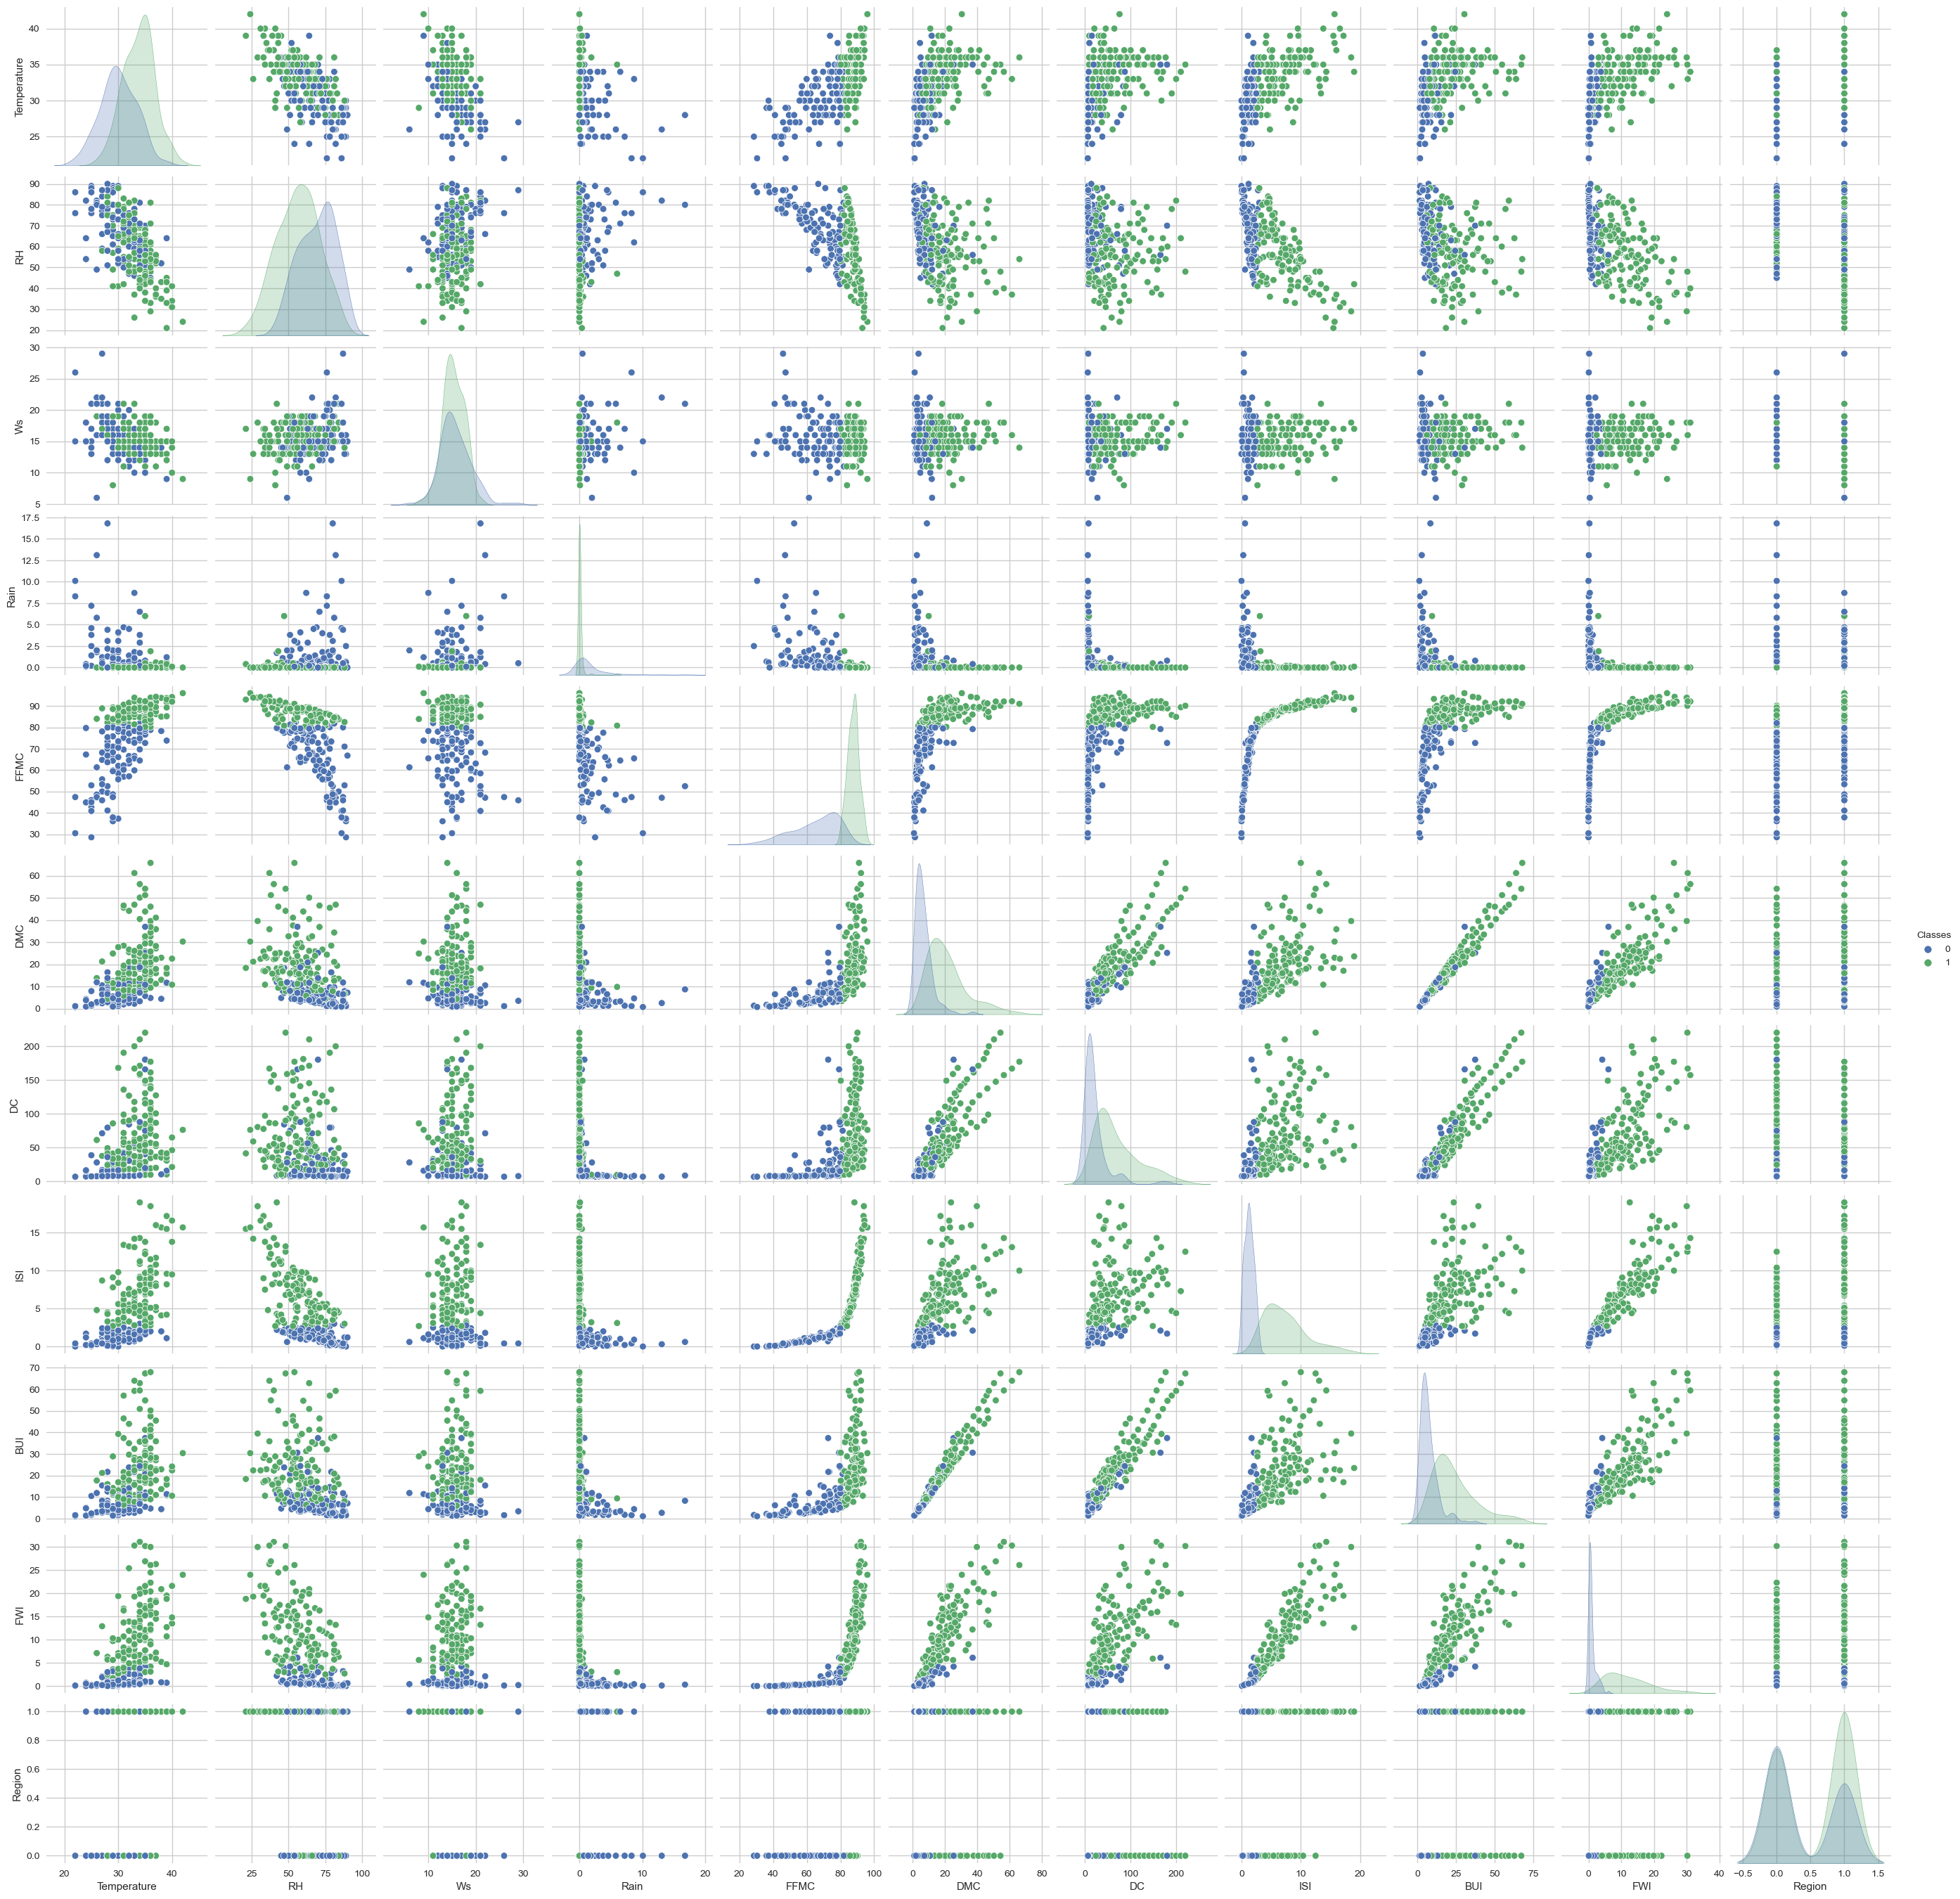

In [729]:
sns.pairplot(df_copy,hue='Classes')

In [686]:
# Correlation

In [687]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.49,0.38,0.60,0.46,0.57,0.52,0.27
RH,-0.65,1.00,0.24,0.22,-0.64,-0.41,-0.23,-0.69,-0.35,-0.58,-0.43,-0.40
Ws,-0.28,0.24,1.00,0.17,-0.17,-0.00,0.08,0.01,0.03,0.03,-0.07,-0.18
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38,-0.04
FFMC,0.68,-0.64,-0.17,-0.54,1.00,0.60,0.51,0.74,0.59,0.69,0.77,0.22
DMC,0.49,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.68,0.98,0.88,0.59,0.19
DC,0.38,-0.23,0.08,-0.30,0.51,0.88,1.00,0.51,0.94,0.74,0.51,-0.08
ISI,0.60,-0.69,0.01,-0.35,0.74,0.68,0.51,1.00,0.64,0.92,0.74,0.26
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.59,0.09
FWI,0.57,-0.58,0.03,-0.32,0.69,0.88,0.74,0.92,0.86,1.00,0.72,0.20


<Axes: >

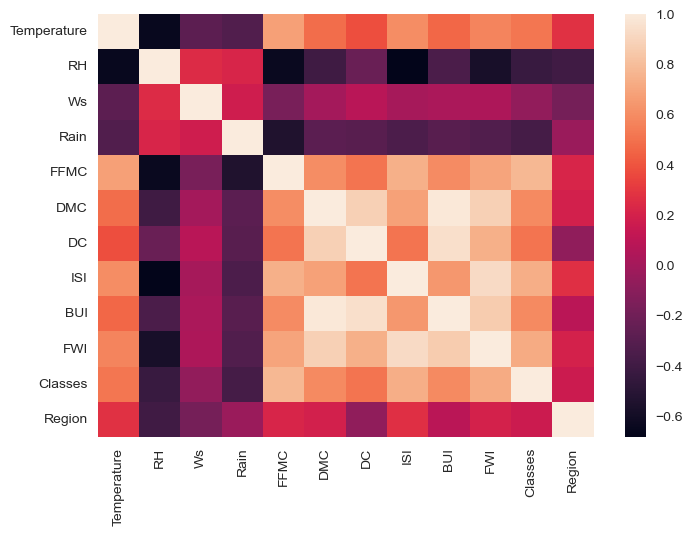

In [688]:
sns.heatmap(df_copy.corr())

<Axes: >

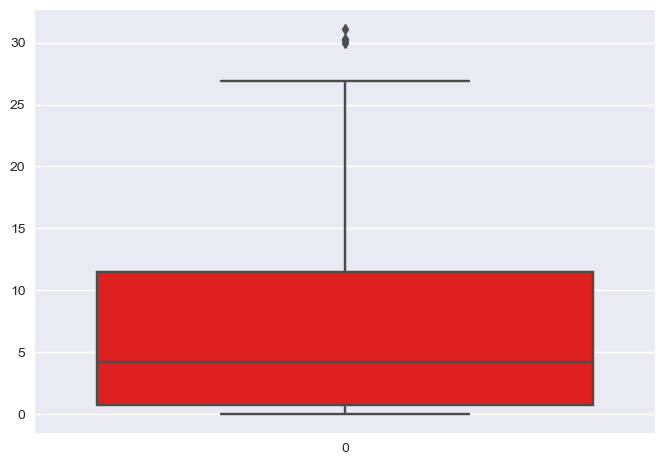

In [689]:
## Box plots
sns.boxplot(df['FWI'],color='red')

In [690]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.00,65.70,3.40,7.60,1.30,3.40,0.50,not fire,0
1,2,6,2012,29,61,13,1.30,64.40,4.10,7.60,1.00,3.90,0.40,not fire,0
2,3,6,2012,26,82,22,13.10,47.10,2.50,7.10,0.30,2.70,0.10,not fire,0
3,4,6,2012,25,89,13,2.50,28.60,1.30,6.90,0.00,1.70,0.00,not fire,0
4,5,6,2012,27,77,16,0.00,64.80,3.00,14.20,1.20,3.90,0.50,not fire,0


In [691]:
## Monthly Fire Analysis

In [693]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.00,65.70,3.40,7.60,1.30,3.40,0.50,not fire,0
1,2,6,2012,29,61,13,1.30,64.40,4.10,7.60,1.00,3.90,0.40,not fire,0
2,3,6,2012,26,82,22,13.10,47.10,2.50,7.10,0.30,2.70,0.10,not fire,0
3,4,6,2012,25,89,13,2.50,28.60,1.30,6.90,0.00,1.70,0.00,not fire,0
4,5,6,2012,27,77,16,0.00,64.80,3.00,14.20,1.20,3.90,0.50,not fire,0


In [701]:
df_fire = df.copy()

In [706]:
df_fire['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

In [709]:
df_fire.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.00,65.70,3.40,7.60,1.30,3.40,0.50,not fire,0
1,2,6,2012,29,61,13,1.30,64.40,4.10,7.60,1.00,3.90,0.40,not fire,0
2,3,6,2012,26,82,22,13.10,47.10,2.50,7.10,0.30,2.70,0.10,not fire,0
3,4,6,2012,25,89,13,2.50,28.60,1.30,6.90,0.00,1.70,0.00,not fire,0
4,5,6,2012,27,77,16,0.00,64.80,3.00,14.20,1.20,3.90,0.50,not fire,0


Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region')

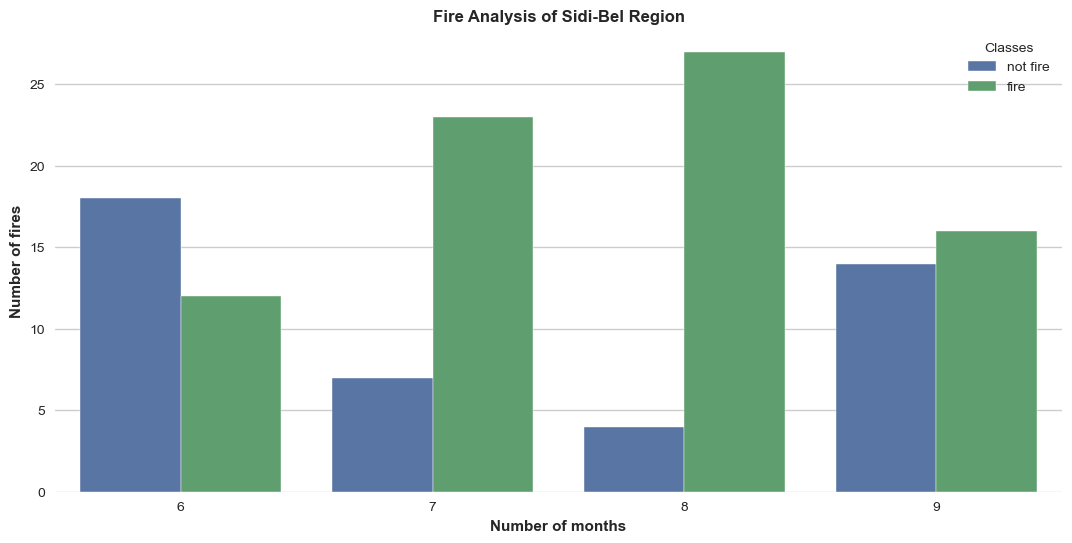

In [720]:
dftemp = df_fire.loc[df['Region']==1]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')

sns.countplot(x='month',hue='Classes', data=dftemp)

plt.ylabel("Number of fires", weight = 'bold')

plt.xlabel("Number of months", weight = 'bold')

plt.title("Fire Analysis of Sidi-Bel Region", weight = 'bold')

In [ ]:
## OBSERVATION: 

Text(0.5, 1.0, 'Fire Analysis of Brjaia Region')

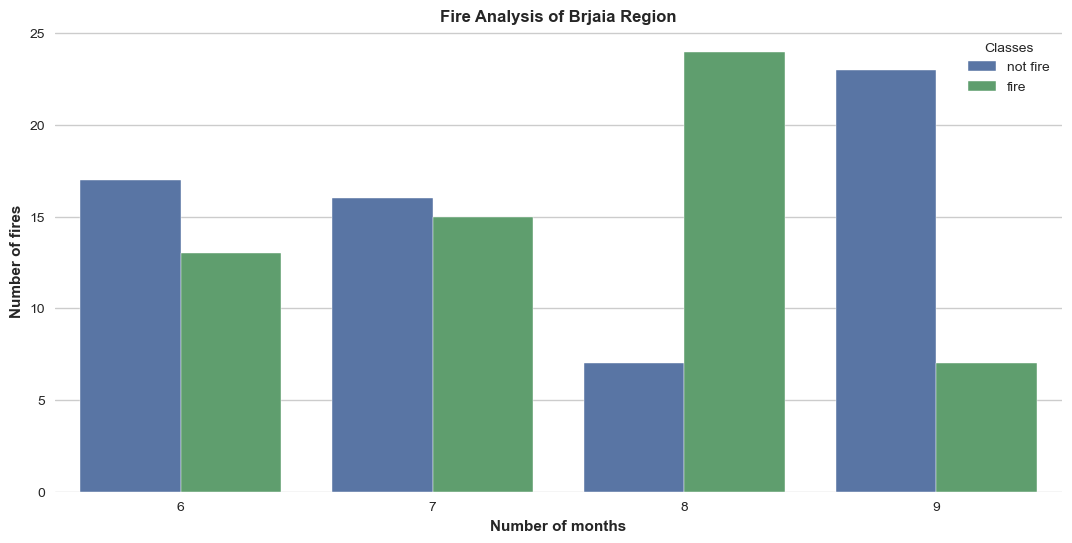

In [721]:
dftemp = df_fire.loc[df['Region']==0]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')

sns.countplot(x='month',hue='Classes', data=dftemp)

plt.ylabel("Number of fires", weight = 'bold')

plt.xlabel("Number of months", weight = 'bold')

plt.title("Fire Analysis of Brjaia Region", weight = 'bold')

## OBSERVATION: In both the regions the highest fire was during the month of August. And very high fires occured in 3 months particularly June, July and August.